In [16]:
import pandas as pd

# Set maximum rows and columns to display to None (no limit)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
file_path = 'api_data_scraped.csv'
df = pd.read_csv(file_path)

# Extract the dataframe for the specified creator
creator_specific_df = df[df['creator'] == 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d']

# Displaying the dataframe for the specific creator
creator_specific_df

,id,canonicalId,status,type,delegate,tasks,context,creator,creatorTeam,createdDate,lastModifiedByUser,lastModifiedDate,links,skills,files,title,meta.tagline,meta.description,meta.migrated,meta.link,meta.cover,meta.linkedin,meta.problemdescription,meta.businessmodeldescription,meta.motivationdescription,meta.synergydescription,meta.valuepropdescription,meta.experiencedescription,meta.sponsoringpasha,meta.newsletterpasha,meta.intrapreneurshipcomittment,meta.pashaenglishlevel,meta.pashaphone,language.original,language.hash,language.lastTranslationDate,language.translatedTo,assignee,assignedAt
792,659bd43e8ee1995d534f08bd,PASHAHolding-kickbox-797,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,1704711230649,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,1704711230713,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,659bd5a834e53d6c9691c60d,PASHAHolding-kickbox-798,REJECTED,kickbox,"[{'id': '64cb909c0f2f393b56f9e78b', 'domain': 'topic', 'context': 'PASHAHolding'}]",[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,1704711592406,4b037ef5-97af-4d0b-acdf-68b56e0915bf,1708346282159,[],"['Graphic-Design', 'Backend', 'Front-End-Development']",NaN,one-click transfer of bonuses to the card,#getBonuses,Every month we must transfer of our bonus from cashback and edvgerial portal.But this is very time consuming and unpleasant way.But we can add button which customers can transfer all bonuses to default card just one click.,NaN,NaN,https://rready-files-prd.s3.eu-central-1.amazonaws.com/PASHAHolding/PASHAHolding-kickbox-798/image/fd8eed6edc3e435eca4f4df8c5d6919fc3334d15.webp,https://www.linkedin.com/in/ismat-samadov-42414b241/,Customer's satisfaction and loyalty increasing .,"After this kind of small changes customer's will use our mobile app and debit cards,because it very handy.",Currently I am using different bank's debit cards which every debit card has own pros and cons.And it is very time consuming such as you must pay restaurants with different cards and markets with a cnother card.When I realized that at the root of this behavior is bonus amount and banking app UI.If we make our app better customer's also will use our app just for comfort and intuitive UI.,"If we can ensure our customer's comfort they will use our different products.Such as someone will use app and then he/she also want use debit cards,credit cards and etc.",It is almost same in every bank.You must add bonus to your card one by one.,I have personal data science projects and also I was worked with closely Unibank OJSC business development team when i was worked as a data/business analyst.,"[{""label"":""Kapital Bank"",""id"":""2""},{""label"":""PASHA Bank"",""id"":""3""}]","[{""label"":""Yes"",""id"":""1""}]","[{""label"":""Yes, I do confirm"",""id"":""1""}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277,665f0cbe3129ac206b2d4e62,PASHAHolding-kickbox-1282,APPROVED,kickbox,"[{'id': '64cb527a0f2f393b56f9e76a', 'domain': 'topic', 'context': 'PASHAHolding'}]",[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,1717505214677,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,1730181242705,"[{'link': {'source': {'id': 'PASHAHolding-kickbox-1282', 'class': 'TICKET'}, 'destination': {'id': '3886940d-4b23-4ec2-b257-6b841dfd7256', 'class': 'USER'}, 'relation': 'WATCHED_BY', 'bidirectional': True}, 'directRelation': 'PASHAHolding-kickbox-1282 WATCHED_BY 3886940d-4b23-4ec2-b257-6b841dfd7256', 'invertedRelation': '3886940d-4b23-4ec2-b257-6b841dfd7256 WATCH PASHAHolding-kickbox-1282'}, {'link': {'source': {'id': 'PASHAHolding-kickbox-1282', 'class': 'TICKET'}, 'destination': {'id': 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d', 'class': 'USER'}, 'relation': 'WATCHED_BY', 'bidirectional': True}, 'directRelation': 'PASHAHolding-kickbox-1282 WATCHED_BY a614efc8-32b8-4cb2-b80b-bc4bd018ed9d', 'invertedRelation': 'a614efc8-32b8-4cb2-b

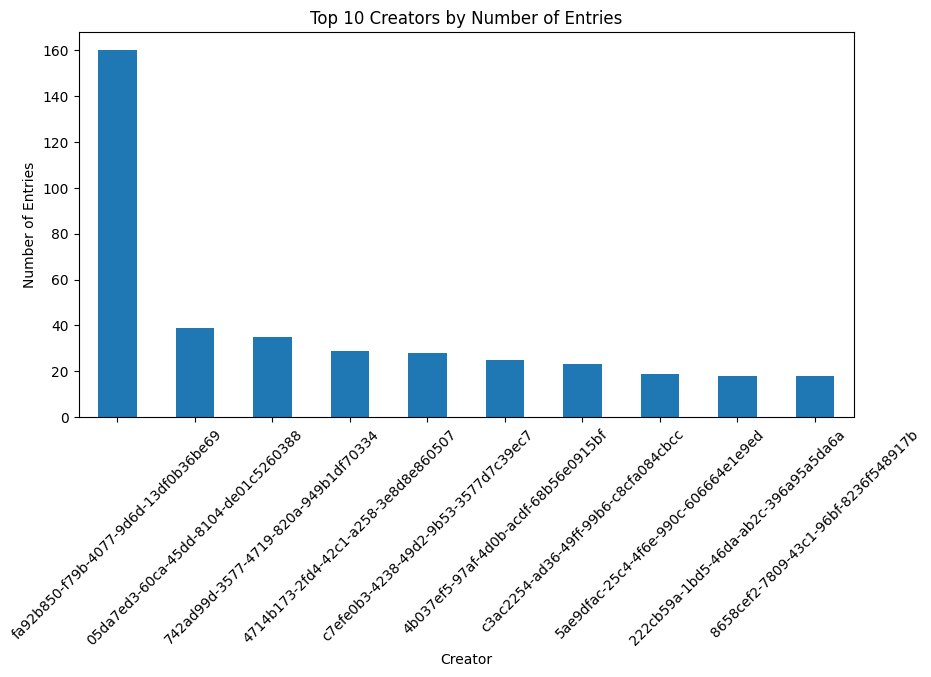

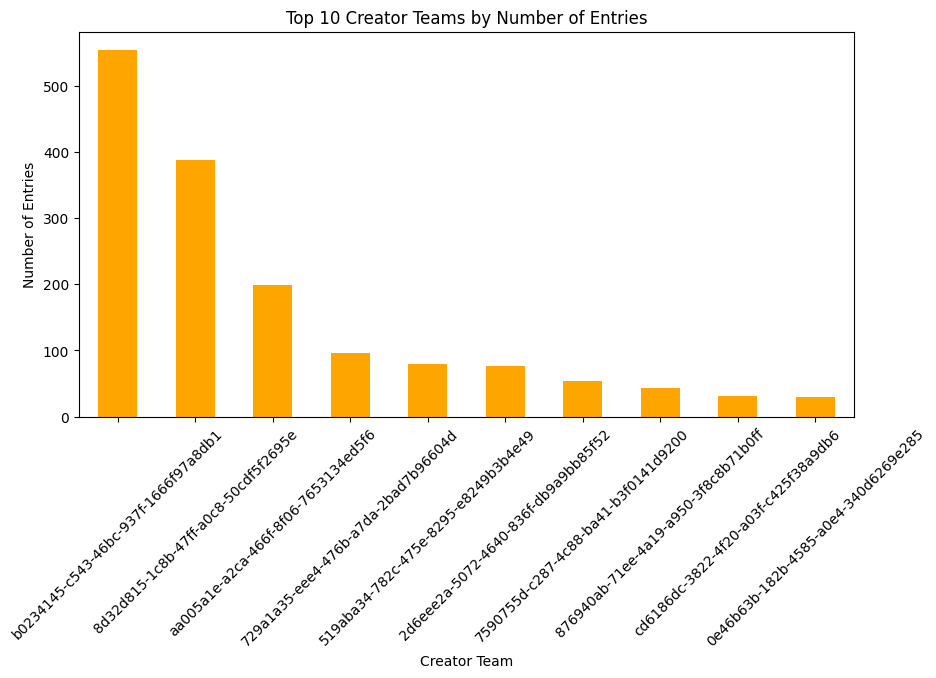

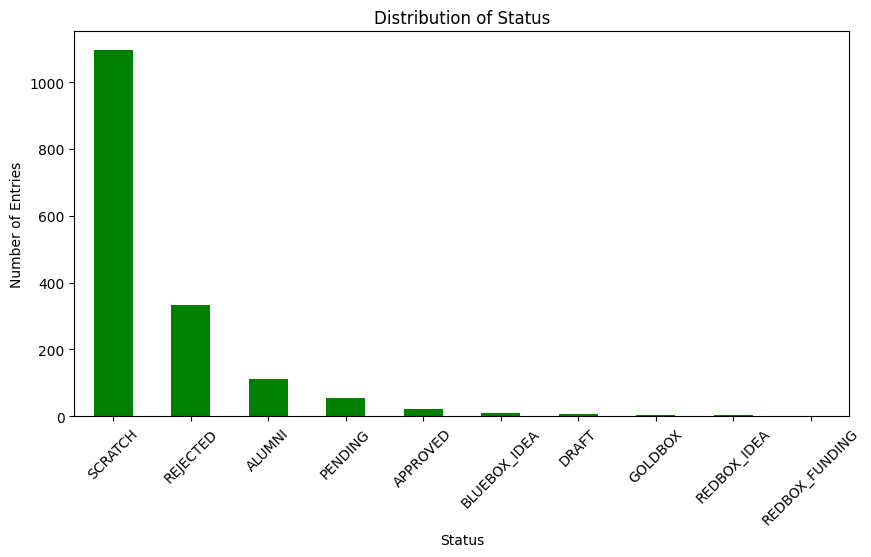

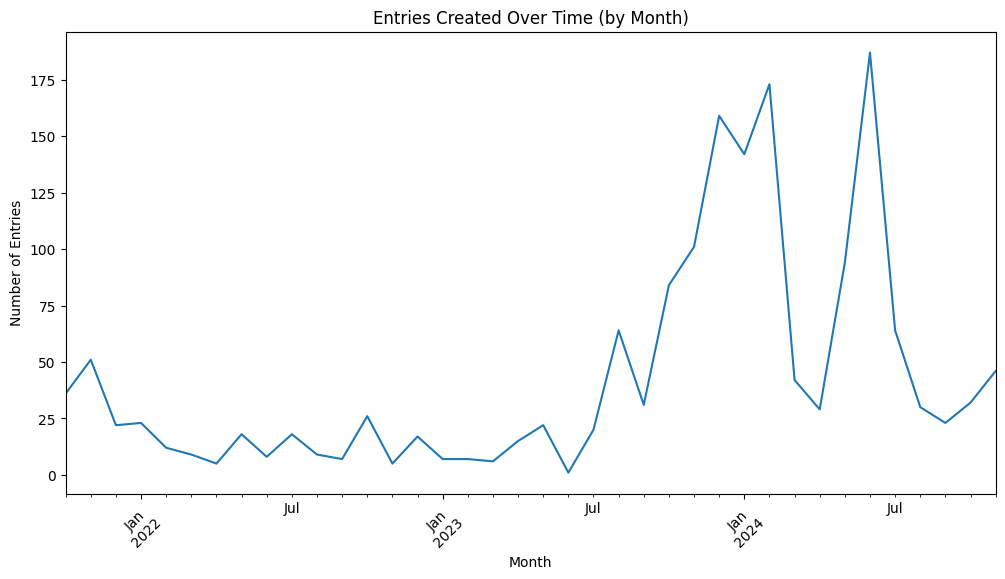

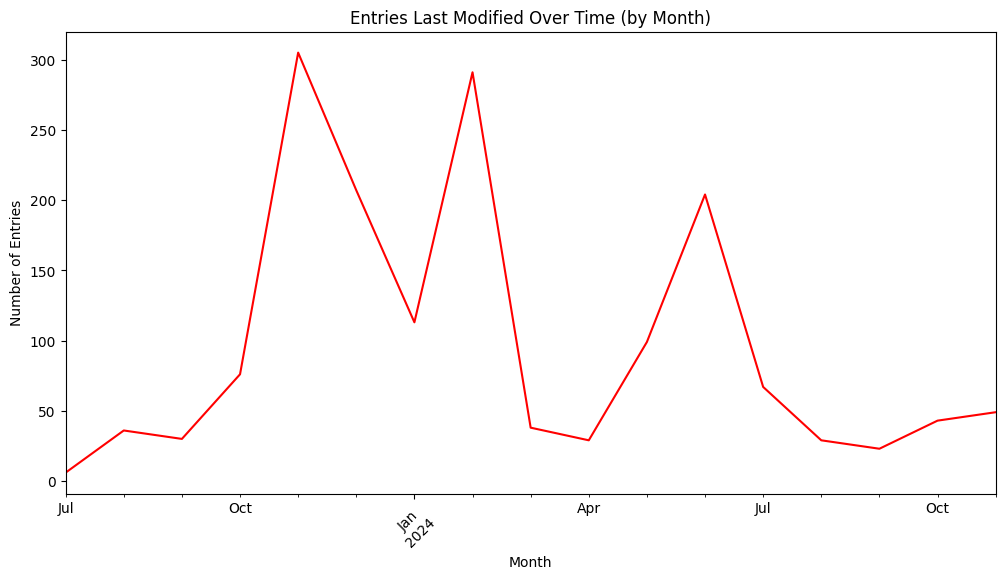

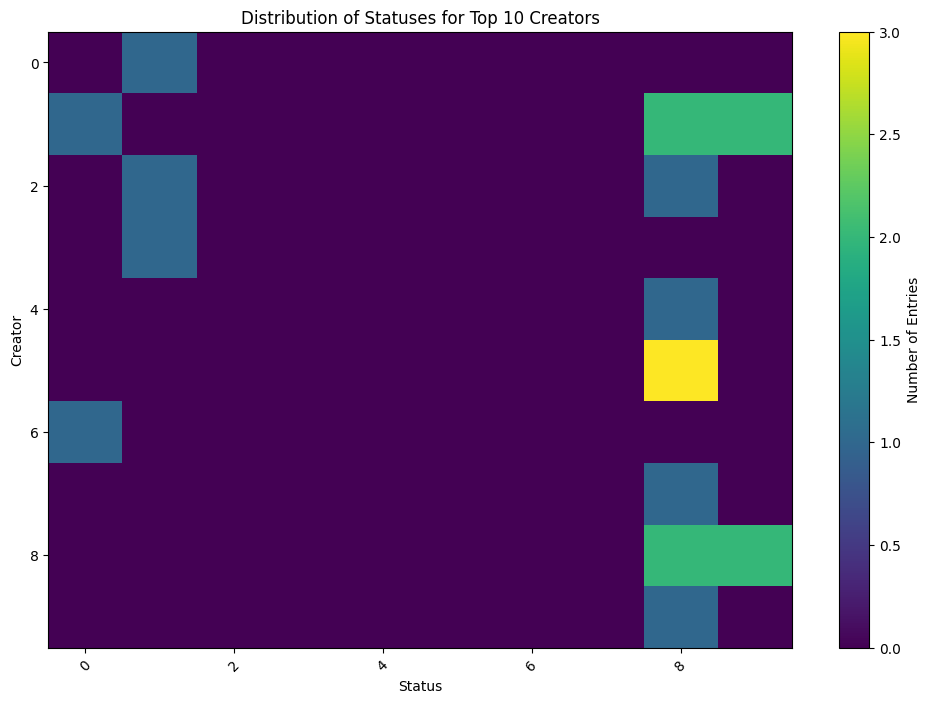

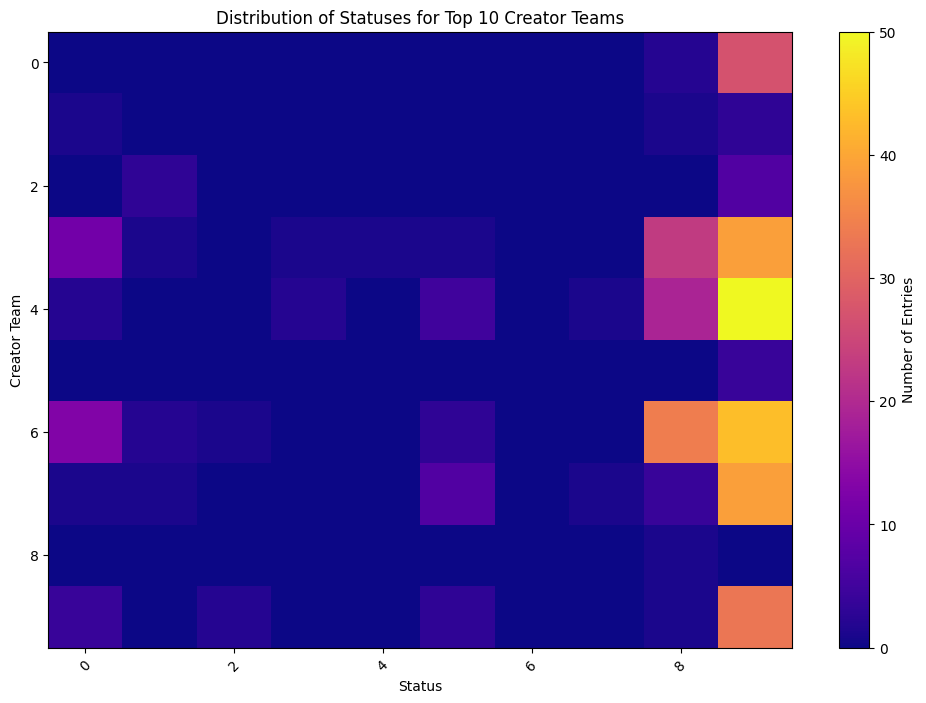

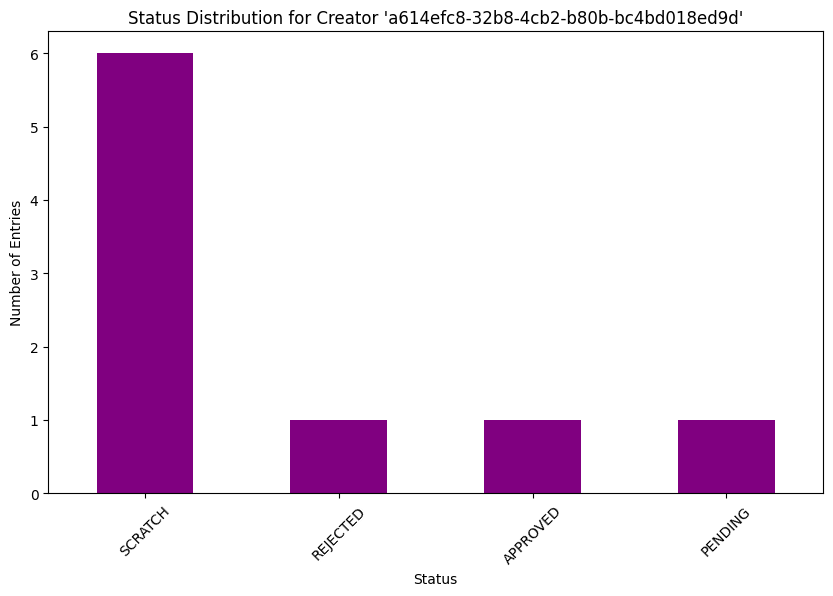

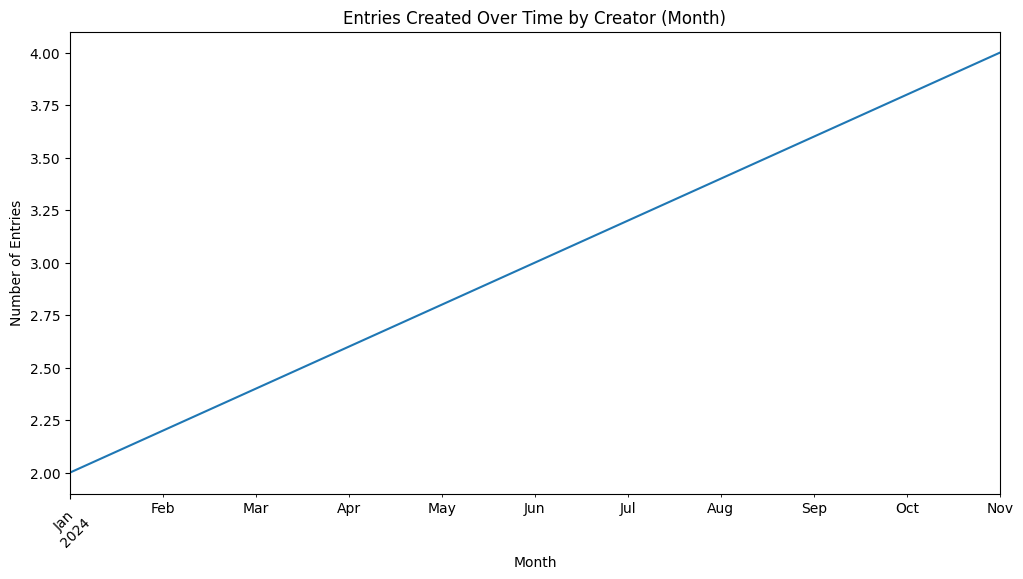

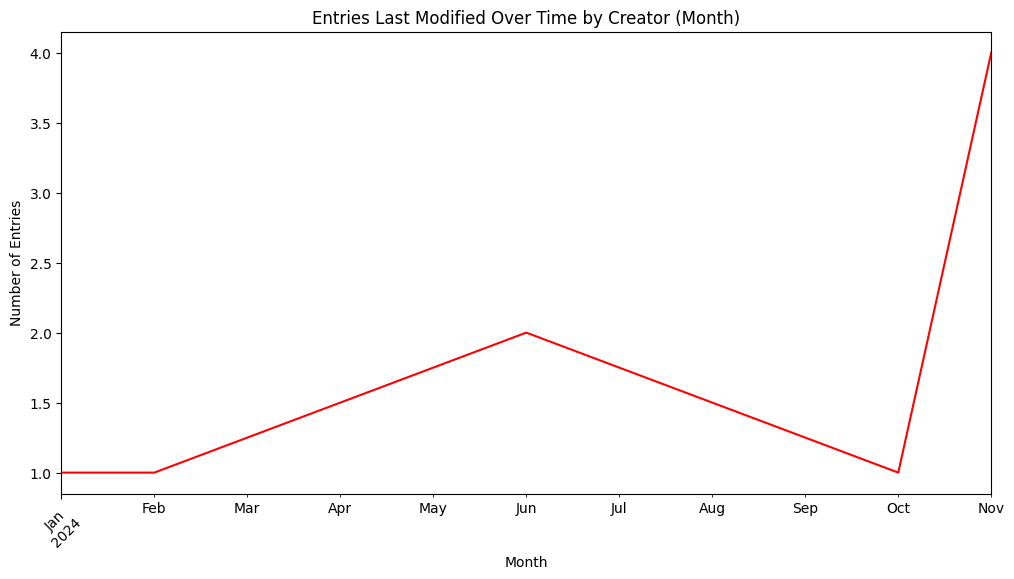

In [8]:
# Full consolidated code for data analysis

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
file_path = 'api_data_scraped.csv'
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
# Dropping columns with more than 70% missing values
threshold = 0.7 * len(data)
data_cleaned = data.dropna(axis=1, thresh=threshold)

# Dropping rows with essential missing fields (id, status)
data_cleaned = data_cleaned.dropna(subset=['id', 'status'])

# Converting timestamps to datetime
def convert_timestamp(timestamp):
    return datetime.fromtimestamp(timestamp / 1000) if pd.notnull(timestamp) else None

if 'createdDate' in data_cleaned.columns:
    data_cleaned['createdDate'] = data_cleaned['createdDate'].apply(convert_timestamp)
if 'lastModifiedDate' in data_cleaned.columns:
    data_cleaned['lastModifiedDate'] = data_cleaned['lastModifiedDate'].apply(convert_timestamp)

# Removing duplicates based on 'id'
data_cleaned = data_cleaned.drop_duplicates(subset='id')

# Cleaning text and categorical data (strip whitespace)
text_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[text_columns] = data_cleaned[text_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 2: Analysis of Creators and Creator Teams
creator_distribution = data_cleaned['creator'].value_counts().head(10)
creator_team_distribution = data_cleaned['creatorTeam'].value_counts().head(10)

# Plotting distributions
plt.figure(figsize=(10, 5))
creator_distribution.plot(kind='bar')
plt.title('Top 10 Creators by Number of Entries')
plt.xlabel('Creator')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
creator_team_distribution.plot(kind='bar', color='orange')
plt.title('Top 10 Creator Teams by Number of Entries')
plt.xlabel('Creator Team')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

# Step 3: Status Distribution
status_distribution = data_cleaned['status'].value_counts()
plt.figure(figsize=(10, 5))
status_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

# Step 4: Trends Over Time (Created and Modified Dates)
date_trends = data_cleaned[['createdDate', 'lastModifiedDate']].copy()
date_trends['createdDate'] = pd.to_datetime(date_trends['createdDate'])
date_trends['lastModifiedDate'] = pd.to_datetime(date_trends['lastModifiedDate'])

plt.figure(figsize=(12, 6))
date_trends['createdDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Entries Created Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
date_trends['lastModifiedDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', color='red')
plt.title('Entries Last Modified Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

# Step 5: Cross-Analysis of 'Creator' and 'Status'
creator_status_distribution = data_cleaned.groupby(['creator', 'status']).size().unstack(fill_value=0).head(10)
plt.figure(figsize=(12, 8))
plt.title('Distribution of Statuses for Top 10 Creators')
plt.xlabel('Status')
plt.ylabel('Creator')
plt.xticks(rotation=45)
plt.imshow(creator_status_distribution, aspect='auto', cmap='viridis')
plt.colorbar(label='Number of Entries')
plt.show()

creator_team_status_distribution = data_cleaned.groupby(['creatorTeam', 'status']).size().unstack(fill_value=0).head(10)
plt.figure(figsize=(12, 8))
plt.title('Distribution of Statuses for Top 10 Creator Teams')
plt.xlabel('Status')
plt.ylabel('Creator Team')
plt.xticks(rotation=45)
plt.imshow(creator_team_status_distribution, aspect='auto', cmap='plasma')
plt.colorbar(label='Number of Entries')
plt.show()

# Step 6: Trends for a Specific Creator (a614efc8-32b8-4cb2-b80b-bc4bd018ed9d)
creator_specific_data = data_cleaned[data_cleaned['creator'] == 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d']
creator_status_distribution = creator_specific_data['status'].value_counts()
plt.figure(figsize=(10, 6))
creator_status_distribution.plot(kind='bar', color='purple')
plt.title("Status Distribution for Creator 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d'")
plt.xlabel('Status')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

creator_time_trends = creator_specific_data[['createdDate', 'lastModifiedDate']].copy()
creator_time_trends['createdDate'] = pd.to_datetime(creator_time_trends['createdDate'])
creator_time_trends['lastModifiedDate'] = pd.to_datetime(creator_time_trends['lastModifiedDate'])

plt.figure(figsize=(12, 6))
creator_time_trends['createdDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Entries Created Over Time by Creator (Month)', xlabel='Month', ylabel='Number of Entries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
creator_time_trends['lastModifiedDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Entries Last Modified Over Time by Creator (Month)', xlabel='Month', ylabel='Number of Entries', color='red')
plt.xticks(rotation=45)
plt.show()



In [17]:
# Extract the dataframe for the specified creator
creator_specific_df = data_cleaned[data_cleaned['creator'] == 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d']

# Displaying the dataframe for the specific creator
creator_specific_df

,id,canonicalId,status,type,delegate,tasks,context,creator,creatorTeam,createdDate,lastModifiedByUser,lastModifiedDate,links,skills
792,659bd43e8ee1995d534f08bd,PASHAHolding-kickbox-797,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-01-08 14:53:50.649,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-01-08 14:53:50.713,[],[]
793,659bd5a834e53d6c9691c60d,PASHAHolding-kickbox-798,REJECTED,kickbox,"[{'id': '64cb909c0f2f393b56f9e78b', 'domain': 'topic', 'context': 'PASHAHolding'}]",[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-01-08 14:59:52.406,4b037ef5-97af-4d0b-acdf-68b56e0915bf,2024-02-19 16:38:02.159,[],"['Graphic-Design', 'Backend', 'Front-End-Development']"
1277,665f0cbe3129ac206b2d4e62,PASHAHolding-kickbox-1282,APPROVED,kickbox,"[{'id': '64cb527a0f2f393b56f9e76a', 'domain': 'topic', 'context': 'PASHAHolding'}]",[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-06-04 16:46:54.677,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-10-29 09:54:02.705,"[{'link': {'source': {'id': 'PASHAHolding-kickbox-1282', 'class': 'TICKET'}, 'destination': {'id': '3886940d-4b23-4ec2-b257-6b841dfd7256', 'class': 'USER'}, 'relation': 'WATCHED_BY', 'bidirectional': True}, 'directRelation': 'PASHAHolding-kickbox-1282 WATCHED_BY 3886940d-4b23-4ec2-b257-6b841dfd7256', 'invertedRelation': '3886940d-4b23-4ec2-b257-6b841dfd7256 WATCH PASHAHolding-kickbox-1282'}, {'link': {'source': {'id': 'PASHAHolding-kickbox-1282', 'class': 'TICKET'}, 'destination': {'id': 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d', 'class': 'USER'}, 'relation': 'WATCHED_BY', 'bidirectional': True}, 'directRelation': 'PASHAHolding-kickbox-1282 WATCHED_BY a614efc8-32b8-4cb2-b80b-bc4bd018ed9d', 'invertedRelation': 'a614efc8-32b8-4cb2-b80b-bc4bd018ed9d WATCH PASHAHolding-kickbox-1282'}, {'link': {'source': {'id': 'PASHAHolding-kickbox-1282', 'class': 'TICKET'}, 'destination': {'id': '121ea5cf-e3b1-42bc-994a-d75e32dd2ce2', 'class': 'USER'}, 'relation': 'WATCHED_BY', 'bidirectional': True}, 'directRelation': 'PASHAHolding-kickbox-1282 WATCHED_BY 121ea5cf-e3b1-42bc-994a-d75e32dd2ce2', 'invertedRelation': '121ea5cf-e3b1-42bc-994a-d75e32dd2ce2 WATCH PASHAHolding-kickbox-1282'}]","['Backend', 'UX-UI-Design', 'Front-End-Development']"
1362,666e9d9369e3b570cd52a8e0,PASHAHolding-kickbox-1367,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-06-16 12:08:51.031,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-06-16 12:08:51.062,[],[]
1363,666e9d9369e3b570cd52a8e1,PASHAHolding-kickbox-1368,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-06-16 12:08:51.042,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-06-16 12:08:51.062,[],[]
1632,6730933917011d2663df8347,PASHAHolding-kickbox-1638,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-11-10 15:04:25.221,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-11-10 15:05:02.113,[],[]
1633,6730933917011d2663df8348,PASHAHolding-kickbox-1639,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-11-10 15:04:25.222,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-11-10 15:04:25.249,[],[]
1634,6730936c17011d2663df8349,PASHAHolding-kickbox-1640,PENDING,kickbox,"[{'id': '64cb527a0f2f393b56f9e76a', 'domain': 'topic', 'context': 'PASHAHolding'}]",[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-11-10 15:05:16.892,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-11-10 15:25:28.370,[],[]
1644,6732462217011d2663df93f0,PASHAHolding-kickbox-1650,SCRATCH,kickbox,[],[],PASHAHolding,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,b0234145-c543-46bc-937f-1666f97a8db1,2024-11-11 22:00:02.265,a614efc8-32b8-4cb2-b80b-bc4bd018ed9d,2024-11-11 22:00:02.318,[],[]


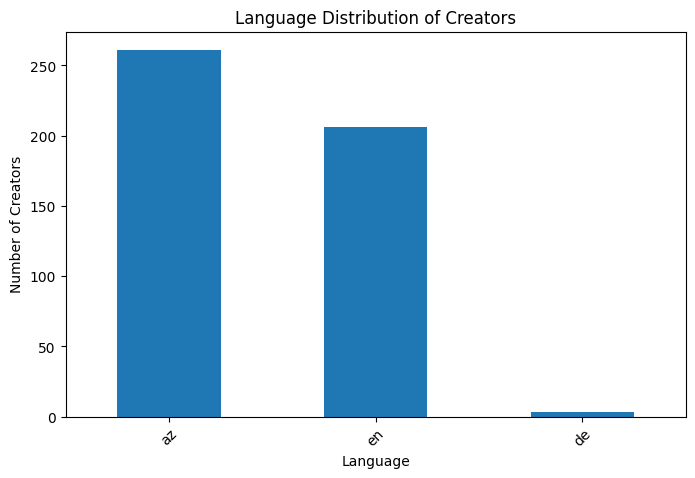

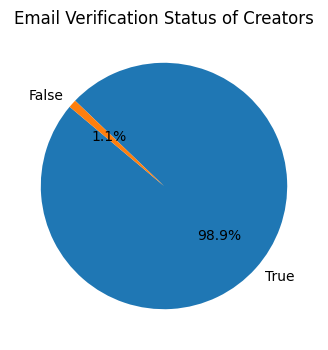

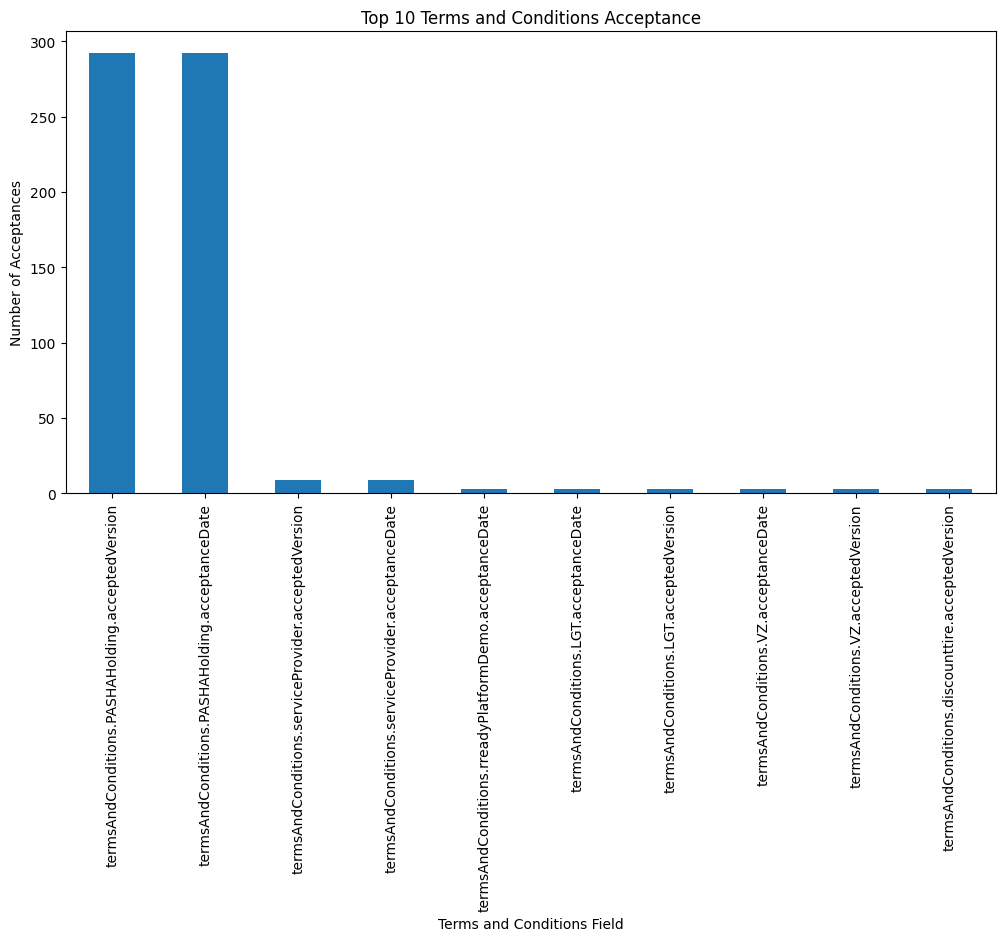

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the creator data
file_path = 'creator_data.csv'
creator_data = pd.read_csv(file_path)

# Analysis 1: Language Distribution
language_distribution = creator_data['language'].value_counts()
plt.figure(figsize=(8, 5))
language_distribution.plot(kind='bar')
plt.title('Language Distribution of Creators')
plt.xlabel('Language')
plt.ylabel('Number of Creators')
plt.xticks(rotation=45)
plt.show()

# # Analysis 2: Context Distribution
# context_distribution = creator_data['context'].value_counts()
# plt.figure(figsize=(8, 5))
# context_distribution.plot(kind='bar', color='orange')
# plt.title('Context Distribution of Creators')
# plt.xlabel('Context')
# plt.ylabel('Number of Creators')
# plt.xticks(rotation=45)
# plt.show()

# Analysis 3: Email Verification Status
email_verification_distribution = creator_data['emailVerified'].value_counts()
plt.figure(figsize=(6, 4))
email_verification_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Email Verification Status of Creators')
plt.ylabel('')
plt.show()

# Analysis 4: Terms and Conditions Acceptance
terms_conditions_columns = [col for col in creator_data.columns if 'termsAndConditions' in col]
terms_conditions_acceptance = creator_data[terms_conditions_columns].notnull().sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
terms_conditions_acceptance.plot(kind='bar')
plt.title('Top 10 Terms and Conditions Acceptance')
plt.xlabel('Terms and Conditions Field')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=90)
plt.show()


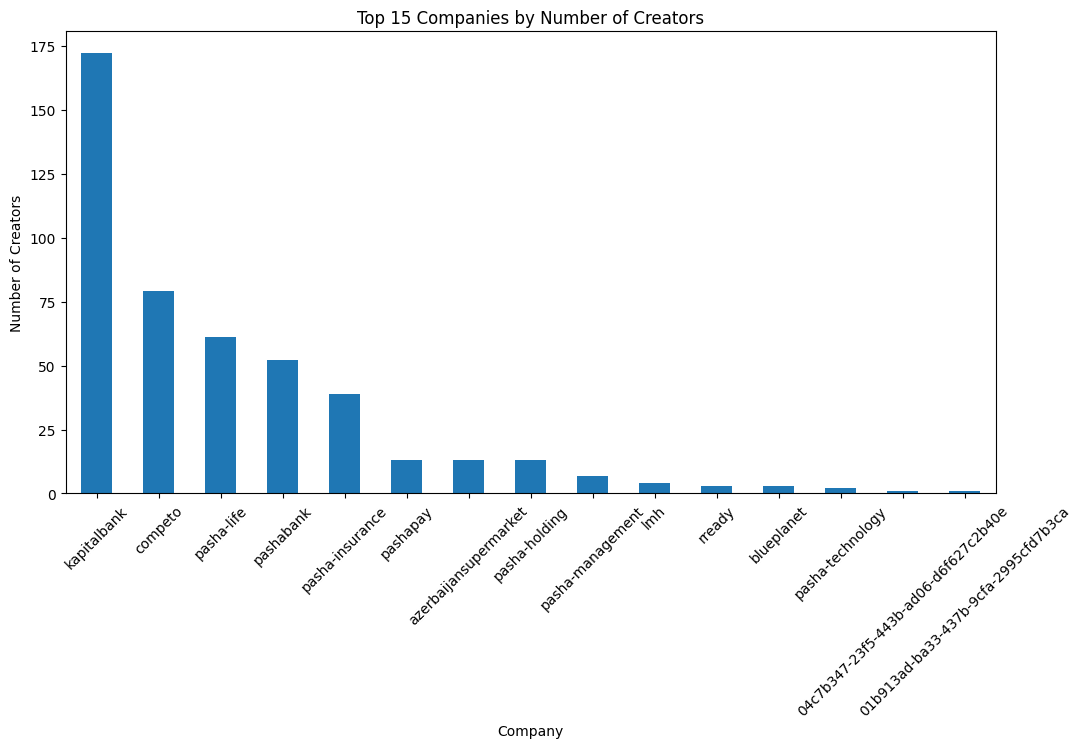

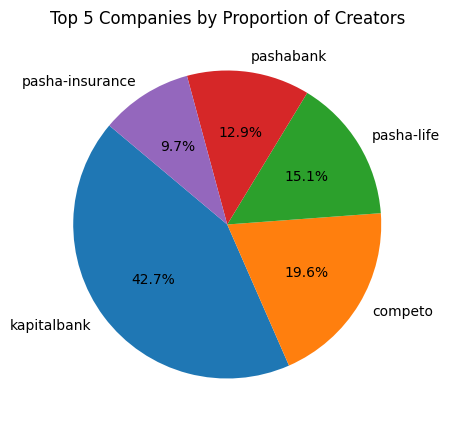

Number of Unique Companies: 22
Top 5 Companies by Proportion of Creators:
company_cleaned
kapitalbank        36.595745
competo            16.808511
pasha-life         12.978723
pashabank          11.063830
pasha-insurance     8.297872
Name: proportion, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the creator data (update file path as needed)
file_path = 'creator_data.csv'  # Replace with actual path
creator_data = pd.read_csv(file_path)

# Extract and clean the company part of the email (if not done previously)
creator_data['company'] = creator_data['email'].str.split('@').str[-1]
creator_data['company_cleaned'] = creator_data['company'].str.split('.').str[0]

# Analysis 1: Company Distribution
company_distribution = creator_data['company_cleaned'].value_counts().head(15)  # Top 15 companies by count
plt.figure(figsize=(12, 6))
company_distribution.plot(kind='bar')
plt.title('Top 15 Companies by Number of Creators')
plt.xlabel('Company')
plt.ylabel('Number of Creators')
plt.xticks(rotation=45)
plt.show()

# Analysis 2: Company Diversity
unique_companies_count = creator_data['company_cleaned'].nunique()  # Count unique companies
company_proportions = creator_data['company_cleaned'].value_counts(normalize=True) * 100  # Calculate proportions
top_company_proportions = company_proportions.head(5)  # Top 5 companies by proportion

# Display top 5 companies by proportion as a pie chart
plt.figure(figsize=(8, 5))
top_company_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Companies by Proportion of Creators')
plt.ylabel('')
plt.show()

# Summary of results
print(f"Number of Unique Companies: {unique_companies_count}")
print("Top 5 Companies by Proportion of Creators:")
print(top_company_proportions)


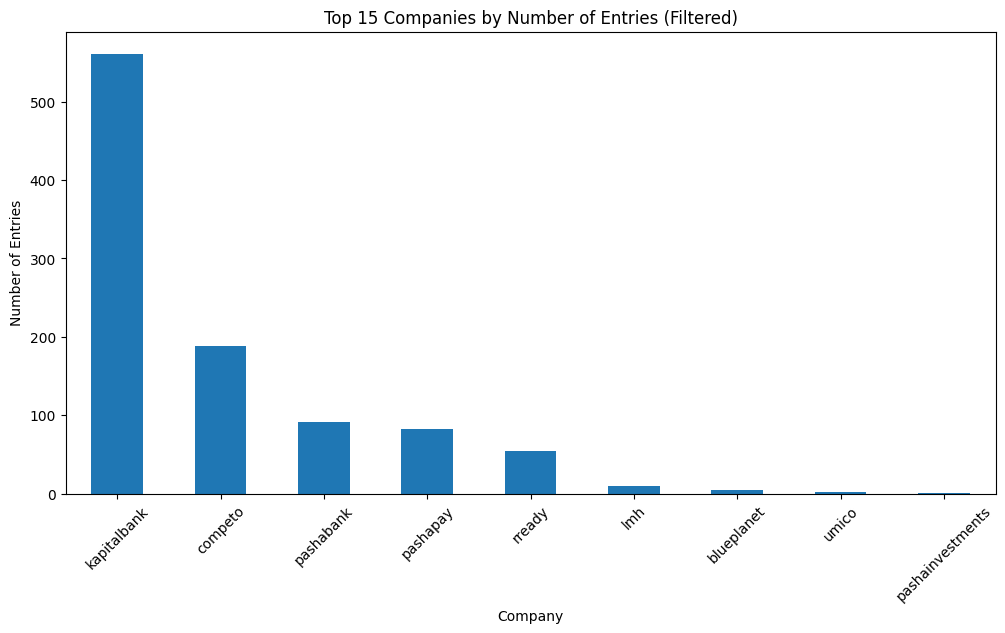

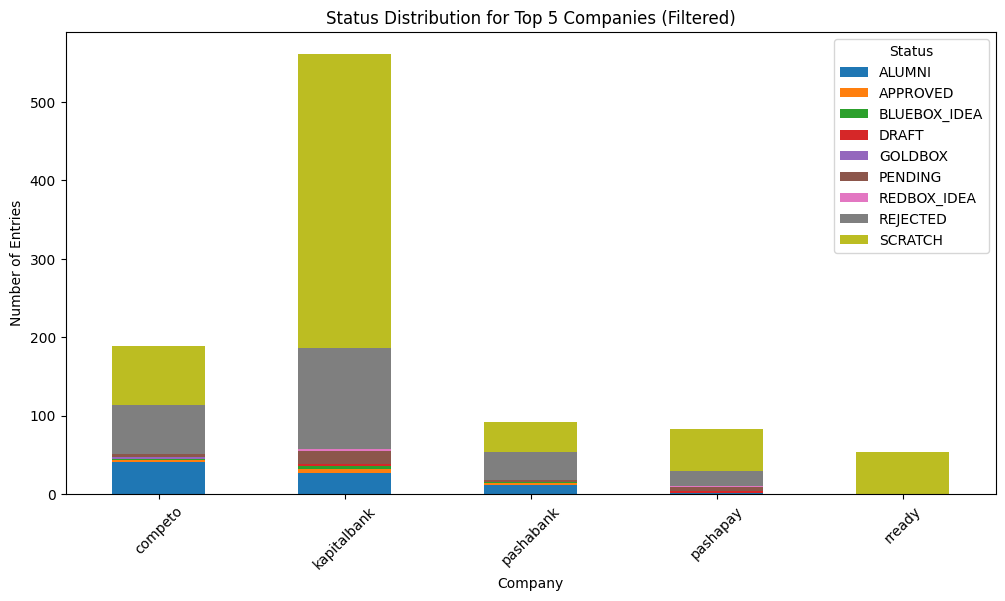

/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_8891/1206302386.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_data['createdDate_x'] = pd.to_datetime(filtered_combined_data['createdDate_x'], errors='coerce', unit='ms')


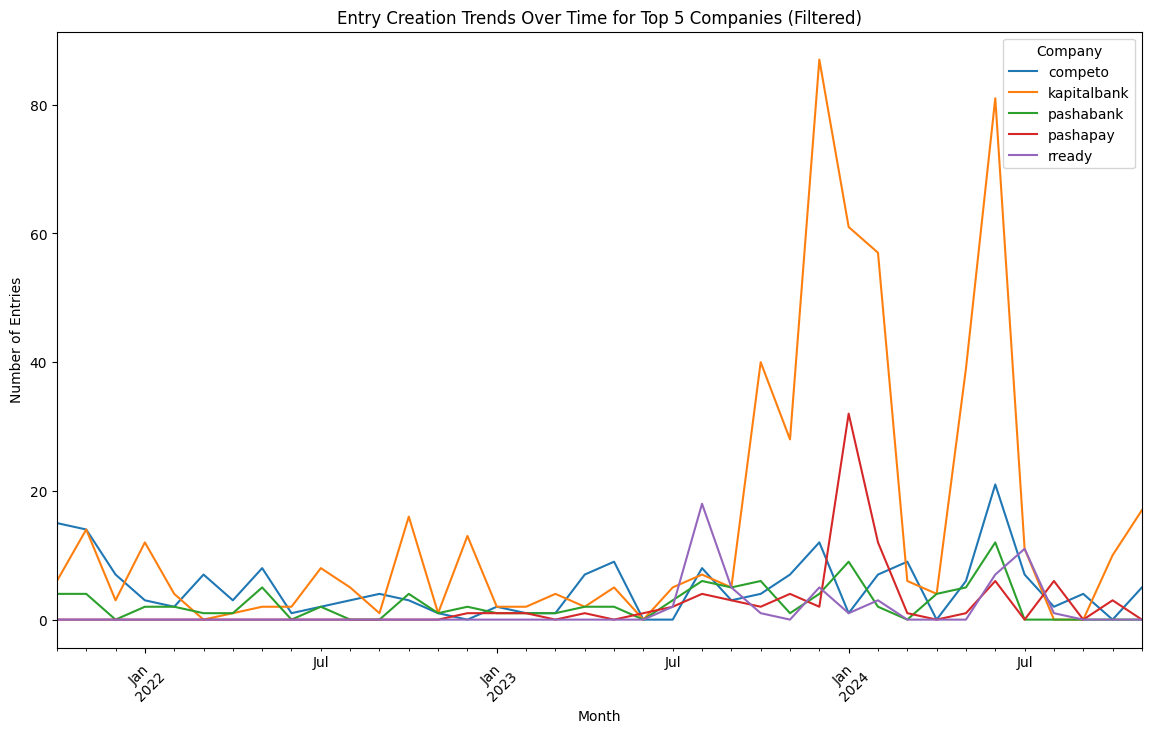

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets (adjust file paths as needed)
main_data_file_path = 'api_data_scraped.csv'  # Update the path as needed
creator_data_file_path = 'creator_data.csv'  # Update the path as needed

main_data = pd.read_csv(main_data_file_path)
creator_data = pd.read_csv(creator_data_file_path)

# Merge the datasets on 'creator' from main_data and 'id' from creator_data
combined_data = pd.merge(main_data, creator_data, left_on='creator', right_on='id', how='left')

# Extract and clean the company part from the email if not already done
combined_data['company'] = combined_data['email'].str.split('@').str[-1]
combined_data['company_cleaned'] = combined_data['company'].str.split('.').str[0]

# Filter out non-company and malformed emails
# Criteria for a valid 'company_cleaned': no numbers and reasonable length
filtered_combined_data = combined_data[
    combined_data['company_cleaned'].str.isalpha() & (combined_data['company_cleaned'].str.len() <= 20)
]

# Analysis 1: Company Contributions (Filtered)
company_contributions_filtered = filtered_combined_data['company_cleaned'].value_counts().head(15)
plt.figure(figsize=(12, 6))
company_contributions_filtered.plot(kind='bar')
plt.title('Top 15 Companies by Number of Entries (Filtered)')
plt.xlabel('Company')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

# Analysis 2: Status Distribution per Company (Filtered, Top 5 Companies)
top_companies_filtered = company_contributions_filtered.index[:5]
status_distribution_per_company_filtered = filtered_combined_data[filtered_combined_data['company_cleaned'].isin(top_companies_filtered)].groupby(['company_cleaned', 'status']).size().unstack(fill_value=0)
status_distribution_per_company_filtered.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Status Distribution for Top 5 Companies (Filtered)')
plt.xlabel('Company')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

# Analysis 3: Temporal Trends (Filtered)
filtered_combined_data['createdDate_x'] = pd.to_datetime(filtered_combined_data['createdDate_x'], errors='coerce', unit='ms')
creation_trends_filtered = filtered_combined_data[filtered_combined_data['company_cleaned'].isin(top_companies_filtered)].groupby([filtered_combined_data['createdDate_x'].dt.to_period('M'), 'company_cleaned']).size().unstack(fill_value=0)
creation_trends_filtered.plot(kind='line', figsize=(14, 8))
plt.title('Entry Creation Trends Over Time for Top 5 Companies (Filtered)')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()


In [4]:
# Calculate the status count per company for all companies
status_count_per_company = filtered_combined_data.groupby(['company_cleaned', 'status']).size().unstack(fill_value=0)

# Sum total entries per status across all companies
status_count_per_company['Total'] = status_count_per_company.sum(axis=1)

# Sort by total entries and show the top 10 companies by total status count
top_companies_by_status = status_count_per_company.sort_values(by='Total', ascending=False).head(10)

# Display the table of top companies by status count
top_companies_by_status


status,ALUMNI,APPROVED,BLUEBOX_IDEA,DRAFT,GOLDBOX,PENDING,REDBOX_IDEA,REJECTED,SCRATCH,Total
company_cleaned,,,,,,,,,,
kapitalbank,27,5,4,3,0,16,2,129,375,561
competo,41,3,1,0,2,4,0,63,75,189
pashabank,12,2,1,0,0,3,0,36,38,92
pashapay,2,0,0,2,0,5,1,20,53,83
rready,0,0,0,0,0,0,0,0,54,54
lmh,0,3,0,0,0,0,0,0,7,10
blueplanet,0,0,0,0,0,0,0,1,4,5
umico,0,0,0,0,0,0,0,0,2,2
pashainvestments,1,0,0,0,0,0,0,0,0,1


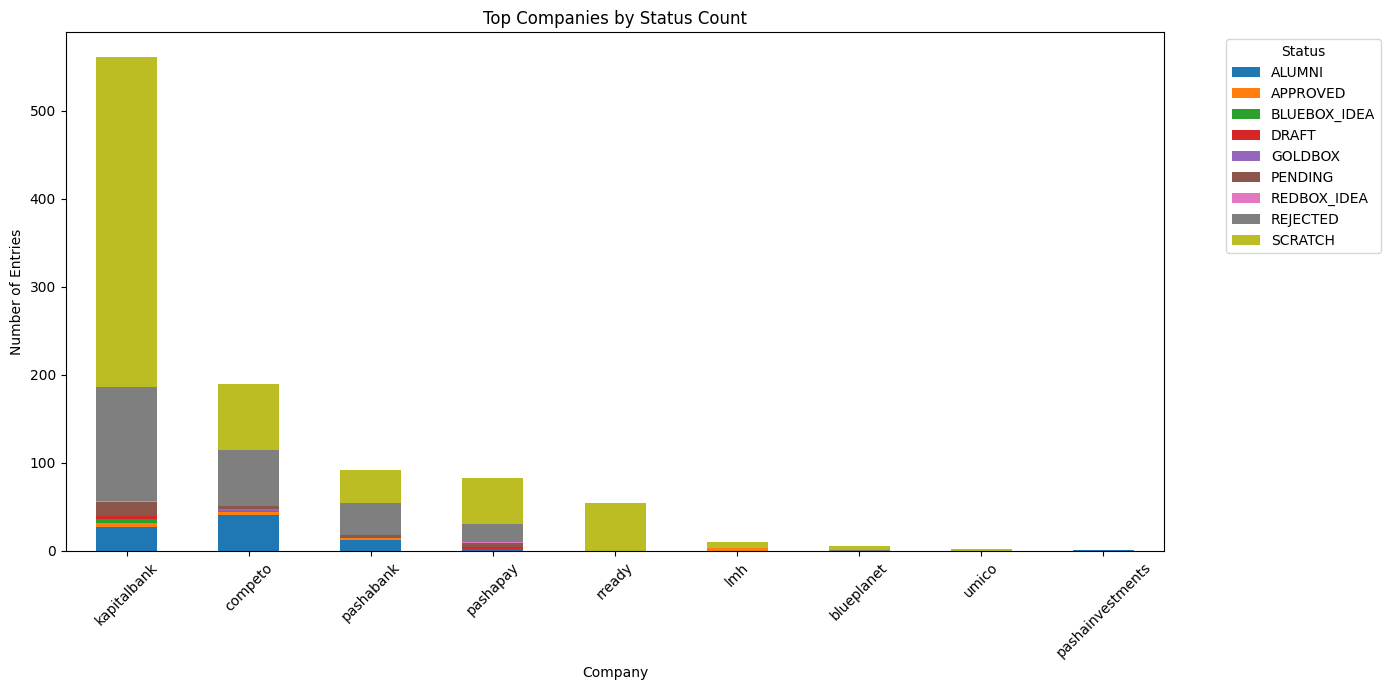

In [5]:
# Visualizing the top companies by status count using a stacked bar chart
top_companies_by_status.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Top Companies by Status Count')
plt.xlabel('Company')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_8891/1974778970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_projects['createdDate_x'] = pd.to_datetime(approved_projects['createdDate_x'], errors='coerce', unit='ms')


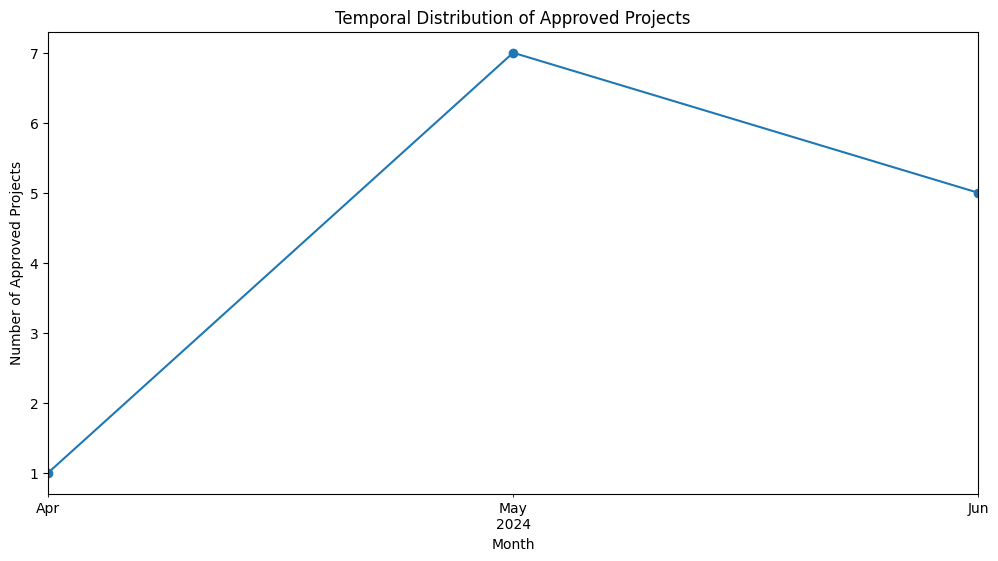

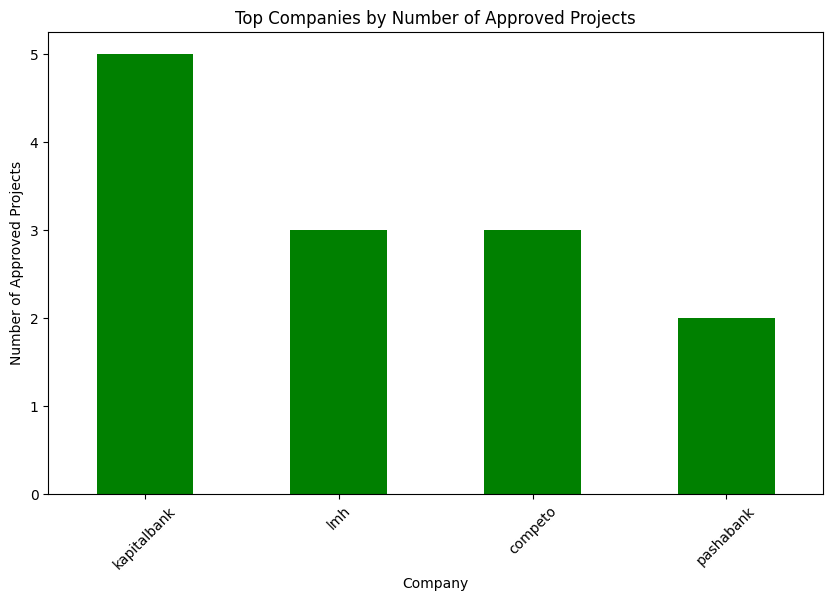

In [7]:
# Filter data for 'APPROVED' status
approved_projects = filtered_combined_data[filtered_combined_data['status'] == 'APPROVED']

# Temporal distribution of approved projects by month
approved_projects['createdDate_x'] = pd.to_datetime(approved_projects['createdDate_x'], errors='coerce', unit='ms')
approved_trends = approved_projects.groupby(approved_projects['createdDate_x'].dt.to_period('M')).size()

# Plotting temporal distribution of approved projects
plt.figure(figsize=(12, 6))
approved_trends.plot(kind='line', marker='o')
plt.title('Temporal Distribution of Approved Projects')
plt.xlabel('Month')
plt.ylabel('Number of Approved Projects')
plt.xticks(rotation=45)
plt.show()

# Analysis of approved projects by company
approved_by_company = approved_projects['company_cleaned'].value_counts().head(10)

# Plotting approved projects by top companies
plt.figure(figsize=(10, 6))
approved_by_company.plot(kind='bar', color='green')
plt.title('Top Companies by Number of Approved Projects')
plt.xlabel('Company')
plt.ylabel('Number of Approved Projects')
plt.xticks(rotation=45)
plt.show()



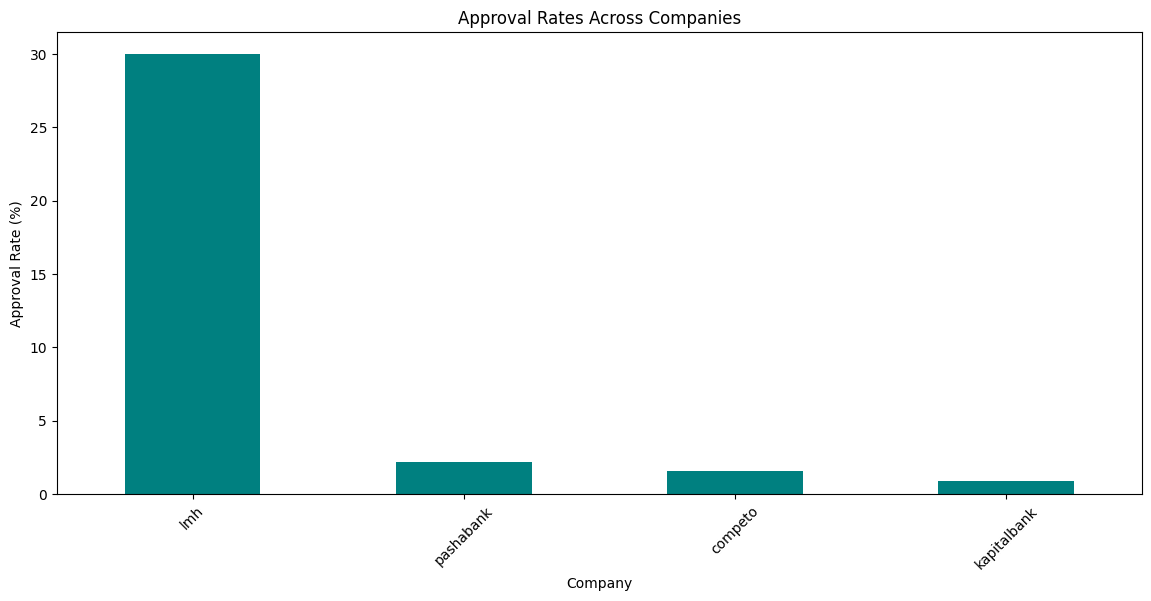

(company_cleaned
 lmh            30.000000
 pashabank       2.173913
 competo         1.587302
 kapitalbank     0.891266
 Name: count, dtype: float64,
 company_cleaned
 lmh            30.000000
 pashabank       2.173913
 competo         1.587302
 kapitalbank     0.891266
 Name: count, dtype: float64)

In [8]:
# Calculate total and approved entries for each company
total_entries_by_company = filtered_combined_data['company_cleaned'].value_counts()
approved_entries_by_company = approved_projects['company_cleaned'].value_counts()

# Calculate approval rates
approval_rates = (approved_entries_by_company / total_entries_by_company) * 100  # Convert to percentage
approval_rates = approval_rates.dropna().sort_values(ascending=False)  # Drop NaN values (companies with zero approvals)

# Plotting approval rates across companies
plt.figure(figsize=(14, 6))
approval_rates.plot(kind='bar', color='teal')
plt.title('Approval Rates Across Companies')
plt.xlabel('Company')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Displaying the approval rates
approval_rates.head(10), approval_rates.tail(10)  # Showing top and bottom 10 companies by approval rates



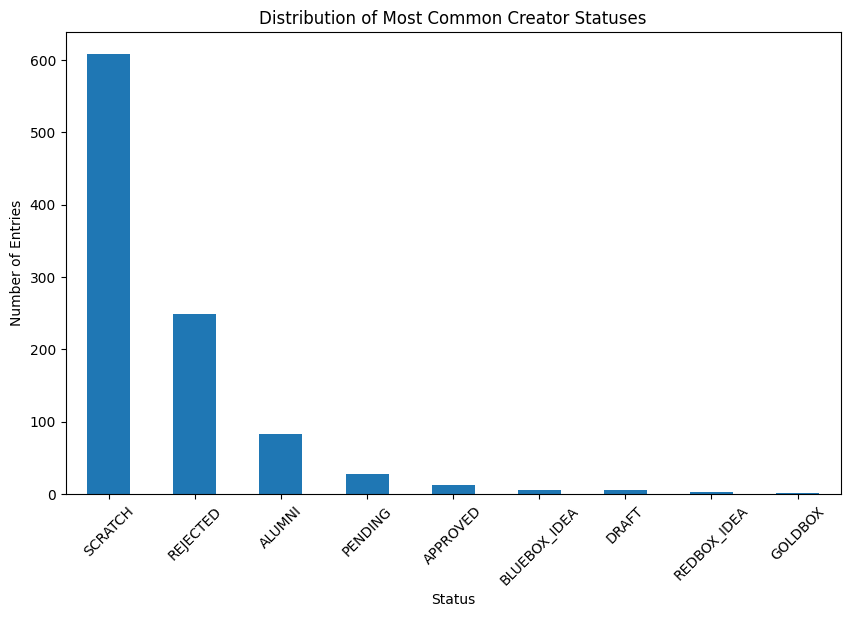

status
SCRATCH         608
REJECTED        249
ALUMNI           83
PENDING          28
APPROVED         13
BLUEBOX_IDEA      6
DRAFT             5
REDBOX_IDEA       3
GOLDBOX           2
Name: count, dtype: int64

In [6]:
# Analysis of the most common statuses among creators
status_distribution = filtered_combined_data['status'].value_counts()

# Plotting the distribution of statuses
plt.figure(figsize=(10, 6))
status_distribution.plot(kind='bar')
plt.title('Distribution of Most Common Creator Statuses')
plt.xlabel('Status')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

# Displaying the distribution data
status_distribution
